# Relative spending on Climate Ads over time democrats and republicans

In [1]:
import sys
sys.path.append('/home/gugy/Documents/political-ad-api/') 
import pandas as pd
import regex as re
from src.political_ads.Preprocessor import *
from src.political_ads.keyword_filter import *
from src.political_ads.grouper import Grouper
from src.political_ads.visualizer import Visualizer

In [2]:
#Code to read from our full dataset:
preprocess = Preprocessor()
df = preprocess.file_to_df('../data/all_politicians_aggregated.txt')

In [3]:
df

,ad_creation_time,ad_creative_body,spend,impressions,delivery_by_region,demographic_distribution,page_id,page_name,bylines,id,spend_lo,spend_hi,impressions_lo,impressions_hi
0,2021-10-14,To show that you're part of our fight to prote...,1749.5,74999.5,"[{'percentage': '0.004793', 'region': 'Alabama...","[{'percentage': '0.010689', 'age': '18-24', 'g...",38471053686,Elizabeth Warren,"WARREN DEMOCRATS, INC.",195916456012328,1500,1999,70000,79999
1,2021-10-14,Nothing is spookier than the ongoing assault o...,149.5,27499.5,"[{'percentage': '0.005051', 'region': 'Alabama...","[{'percentage': '0.000629', 'age': '18-24', 'g...",38471053686,Elizabeth Warren,"WARREN DEMOCRATS, INC.",197833945796073,100,199,25000,29999
2,2021-10-14,To show that you're part of our fight to prote...,1749.5,162499.5,"[{'percentage': '0.004873', 'region': 'Alabama...","[{'percentage': '0.005081', 'age': '18-24', 'g...",38471053686,Elizabeth Warren,"WARREN DEMOCRATS, INC.",396978045241497,1500,1999,150000,174999
3,2021-10-14,To show that you're part of our fight to prote...,1749.5,64999.5,"[{'percentage': '0.005017', 'region': 'Alabama...","[{'percentage': '0.000233', 'age': '18-24', 'g...",38471053686,Elizabeth Warren,"WARREN DEMOCRATS, INC.",403080218132713,1500,1999,60000,69999
4,2021-10-14,Nothing is spookier than the ongoing assault o...,149.5,8499.5,"[{'percentage': '0.000315', 'region': 'South D...","[{'percentage': '0.005707', 'age': '45-54', 'g...",38471053686,Elizabeth Warren,"WARREN DEMOCRATS, INC.",419715089547456,100,199,8000,8999
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
602541,2018-08-30,It’s Mike’s Birthday and he wants a clean plan...,49.5,499.5,"[{'percentage': '1', 'region': 'Pennsylvania'}]","[{'percentage': '0.002494', 'age': '18-24', 'g...",174750213023790,"Mike Doyle for PA Representative, 170th District",Friends To Elect Mike Doyle,228443758015782,0,99,0,999
602542,2018-08-30,"Send Mike a ""birthday"" gift for his 41st birth...",49.5,1499.5,"[{'percentage': '1', 'region': 'Pennsylvania'}]","[{'percentage': '0.001106', 'age': '18-24', 'g...",174750213023790,"Mike Doyle for PA Representative, 170th District",Friends To Elect Mike Doyle,470785400088043,0,99,1000,1999
602543,2018-08-24,Mike's turning 41! Help him celebrate his birt...,49.5,499.5,"[{'percentage': '1', 'region': 'Pennsylvania'}]","[{'percentage': '0.003205', 'age': '18-24', 'g...",174750213023790,"Mike Doyle for PA Representative, 170th District",Friends To Elect Mike Doyle,382470918955364,0,99,0,999
602544,2018-08-22,Hope to see everyone tonight!,49.5,499.5,"[{'percentage': '1', 'region': 'Pennsylvania'}]","[{'percentage': '0.066806', 'age': '25-34', 'g...",174750213023790,"Mike Doyle for PA Representative, 170th District",Friends To Elect Mike Doyle,457482704660129,0,99,0,999


In [4]:
ids = pd.read_csv('../src/data_sets/legislators_fb_info_final.csv')
ids = ids[['full_name', 'page_id', 'party']]

In [5]:
df = df.merge(ids, how='left', left_on='page_id', right_on='page_id')
# Adding preprocessing steps to the dataset
full_set = df[df.ad_creative_body.isna()==False]

#Adding keyword climate labels
c_filter = Filter()
c_filter.add_climate_label(full_set)


/home/gugy/Documents/political-ad-api/src/political_ads/keyword_filter.py:25: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  data['keyword_label'] = data.apply(lambda x: "Climate" if self.check_for_climate_ad(str(x["ad_creative_body"])) else "Non-climate", axis=1) # returns the rows that return true


In [6]:
#full_set[full_set.spend!=full_set.spend_mid]

In [7]:
def add_mid_imp(full_set):
    full_set['impressions_mid'] = full_set.apply(lambda x: x['impressions_lo']+((x['impressions_hi']-x['impressions_lo'])/2), axis=1)
    
def add_climate_ad_imp(full_set):
    full_set['climate_imp'] = full_set.apply(lambda x: x.impressions_mid if x.keyword_label=='Climate' else 0, axis=1)
    full_set['nonclimate_imp'] = full_set.apply(lambda x: x.impressions_mid if x.keyword_label=='Non-climate' else 0, axis=1)
    
def add_mid_spend(full_set):
    full_set['spend_mid'] = full_set.apply(lambda x: x['spend_lo']+((x['spend_hi']-x['spend_lo'])/2), axis=1)
    
def add_climate_ad_spend(full_set):
    full_set['climate_spend'] = full_set.apply(lambda x: x.spend_mid if x.keyword_label=='Climate' else 0, axis=1)
    full_set['nonclimate_spend'] = full_set.apply(lambda x: x.spend_mid if x.keyword_label=='Non-climate' else 0, axis=1)
    

In [8]:
add_mid_spend(full_set)
add_climate_ad_spend(full_set)


/tmp/ipykernel_1805/322835451.py:9: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  full_set['spend_mid'] = full_set.apply(lambda x: x['spend_lo']+((x['spend_hi']-x['spend_lo'])/2), axis=1)
/tmp/ipykernel_1805/322835451.py:12: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  full_set['climate_spend'] = full_set.apply(lambda x: x.spend_mid if x.keyword_label=='Climate' else 0, axis=1)
/tmp/ipykernel_1805/322835451.py:13: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
T

In [9]:
add_mid_imp(full_set)
add_climate_ad_imp(full_set)


/tmp/ipykernel_1805/322835451.py:2: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  full_set['impressions_mid'] = full_set.apply(lambda x: x['impressions_lo']+((x['impressions_hi']-x['impressions_lo'])/2), axis=1)
/tmp/ipykernel_1805/322835451.py:5: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  full_set['climate_imp'] = full_set.apply(lambda x: x.impressions_mid if x.keyword_label=='Climate' else 0, axis=1)
/tmp/ipykernel_1805/322835451.py:6: SettingWithCopyWarning: 
A value is trying to be set on a copy of a

In [10]:
full_set = full_set[full_set.ad_creation_time>'2018-04-01']

In [11]:
democrats = full_set[full_set.party=='Democrat']
republicans = full_set[full_set.party=='Republican']

In [12]:
repG = republicans.groupby(pd.Grouper(key='ad_creation_time',freq='M'))[['climate_imp', 'nonclimate_imp', 'impressions_mid','climate_spend', 'spend_mid']].sum()

In [13]:
demG = democrats.groupby(pd.Grouper(key='ad_creation_time',freq='M'))[['climate_imp', 'impressions_mid', 'climate_spend','spend_mid']].sum()

In [14]:
demG['relative_climate_imp'] = demG.apply(lambda x: x.climate_imp/x.impressions_mid, axis=1)
demG['relative_climate_spend'] = demG.apply(lambda x: x.climate_spend/x.spend_mid, axis=1)

/tmp/ipykernel_1805/977153948.py:1: RuntimeWarning: invalid value encountered in double_scalars
  demG['relative_climate_imp'] = demG.apply(lambda x: x.climate_imp/x.impressions_mid, axis=1)
/tmp/ipykernel_1805/977153948.py:2: RuntimeWarning: invalid value encountered in double_scalars
  demG['relative_climate_spend'] = demG.apply(lambda x: x.climate_spend/x.spend_mid, axis=1)


In [15]:
repG['relative_climate_imp'] = repG.apply(lambda x: x.climate_imp/x.impressions_mid, axis=1)
repG['relative_climate_spend'] = repG.apply(lambda x: x.climate_spend/x.spend_mid, axis=1)

### Plotting

In [16]:
from matplotlib import pyplot as plt
from math import log

In [17]:
dates = demG.index.tolist()
dems = demG.relative_climate_imp.to_list()
reps = repG[repG.index>'2017-05-31'].relative_climate_imp


In [18]:
# fig, ax1 = plt.subplots()

# ax1.plot(demG.index, demG.relative_climate_imp, label = "Impressions", color='blue', linestyle="--")
# ax1.set_xlabel("Time")
# ax1.set_ylabel("Percentage Climate Ads")
# ax1.tick_params(axis='x', rotation=30)

# ax1.plot(demG.index, demG.relative_climate_spend, label = "Spend", color='green', linestyle="-")

# ax1.title("Percentage Cliamte Ads Relative to All Ads")

# plt.legend()



In [19]:
from datetime import datetime

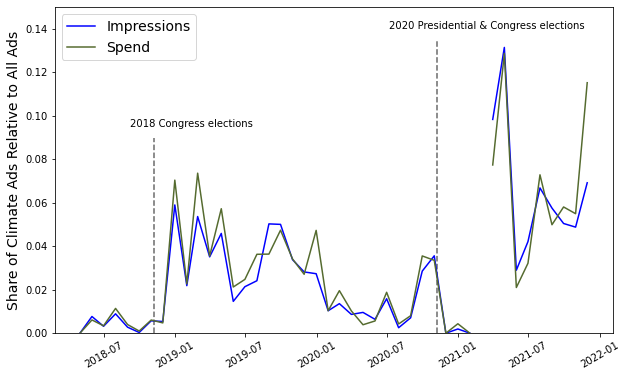

: 

In [92]:
plt.figure(figsize=(10,6))

plt.plot(demG.index, demG.relative_climate_imp, label = "Impressions", color='blue')

plt.ylabel("Share of Climate Ads Relative to All Ads", fontsize=14)
plt.tick_params(axis='x', rotation=30)

plt.ylim([0,0.15])

plt.plot(demG.index, demG.relative_climate_spend, label = "Spend", color='darkolivegreen')
plt.legend(loc='upper left', prop={'size':14})

plt.vlines(x=pd.Timestamp("2018-11-06"), ymin=0, ymax=0.090, color='dimgrey', linestyles='--')

plt.text(x=pd.Timestamp("2018-09-06"), y=0.095, s='2018 Congress elections')

plt.vlines(x=pd.Timestamp("2020-11-06"), ymin=0, ymax=0.135, color='dimgrey', linestyles='--')

plt.text(x=pd.Timestamp("2020-07-06"), y=0.14, s='2020 Presidential & Congress elections')

plt.savefig("Democrats_climate_relative.png", dpi=600, bbox_inches='tight')


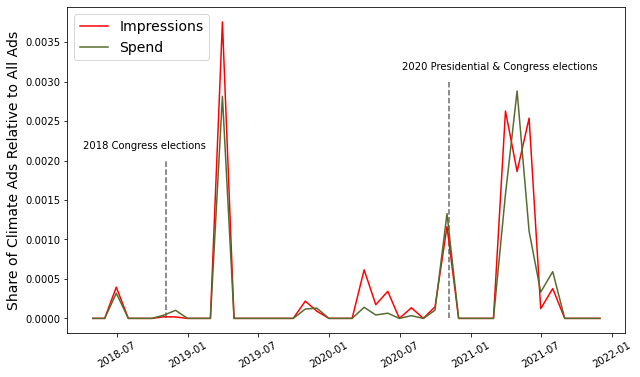

In [91]:
plt.figure(figsize=(10,6))

plt.plot(repG.index, repG.relative_climate_imp, label = "Impressions", color='red')

plt.ylabel("Share of Climate Ads Relative to All Ads", fontsize=14)
plt.tick_params(axis='x', rotation=30)


plt.plot(repG.index, repG.relative_climate_spend, label = "Spend", color='darkolivegreen')
plt.legend(loc='upper left', prop={'size':14})

plt.vlines(x=pd.Timestamp("2018-11-06"), ymin=0, ymax=0.0020, color='dimgrey', linestyles='--')

plt.text(x=pd.Timestamp("2018-04-06"), y=0.00215, s='2018 Congress elections')

plt.vlines(x=pd.Timestamp("2020-11-06"), ymin=0, ymax=0.003, color='dimgrey', linestyles='--')

plt.text(x=pd.Timestamp("2020-07-06"), y=0.00315, s='2020 Presidential & Congress elections')


plt.savefig("republican_climate_relative.png", dpi=600, bbox_inches='tight')

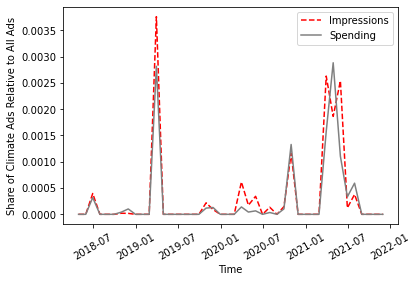

In [ ]:


plt.plot(repG.index, repG.relative_climate_imp, label = "Impressions", color='red', linestyle="--")
plt.xlabel("Time")
plt.ylabel("Share of Climate Ads Relative to All Ads")
plt.tick_params(axis='x', rotation=30)

plt.plot(repG.index, repG.relative_climate_spend, label = "Spending", color='grey', linestyle="-")

plt.legend()




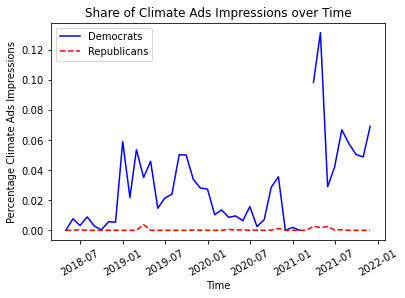

In [ ]:
x = range(0, len(dates))

plt.plot(dates, dems, label = "Democrats", color='blue', linestyle="-")
plt.plot(dates, reps, label = "Republicans", color='red', linestyle="--")
plt.xticks(rotation=30)
plt.legend()
plt.xlabel("Time")
plt.ylabel("Percentage Climate Ads Impressions")
plt.title("Share of Climate Ads Impressions over Time")
plt.savefig("../plots/time series/relative_amount_climate_ads.pdf", bbox_inches='tight')
plt.savefig("../plots/time series/relative_amount_climate_ads.png", dpi=600, bbox_inches='tight')

### Plotting relative spend on climate ads

In [ ]:
dates = demG.index.tolist()
dems = demG.relative_climate_spend.to_list()
reps = repG[repG.index>'2017-05-31'].relative_climate_spend.to_list()

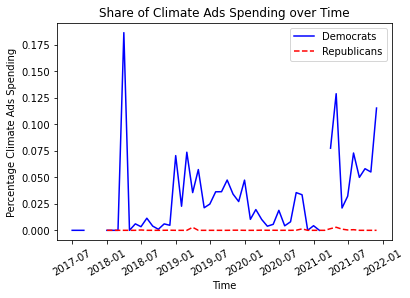

In [ ]:

plt.plot(dates, dems, label = "Democrats", color='blue', linestyle="-")
plt.plot(dates, reps, label = "Republicans", color='red', linestyle="--")
plt.xticks(rotation=30)
plt.legend()
plt.xlabel("Time")
plt.ylabel("Percentage Climate Ads Spending")
plt.title("Share of Climate Ads Spending over Time")

plt.savefig("../plots/time series/relative_amount_climate_spending.pdf", bbox_inches='tight')
plt.savefig("../plots/time series/relative_amount_climate_spending.png", dpi=600, bbox_inches='tight')
#plt.show()